In [96]:
import numpy as np
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr, fisher_exact, f
import statsmodels.api as sm
from statsmodels.sandbox.stats.runs import runstest_1samp
from statsmodels.stats.stattools import durbin_watson
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import gridspec

In [70]:
plt.style.use('ggplot')

Оценка тренда и периодической составляющей

In [71]:
alpha = np.random.choice(np.linspace(-20, 20, 100))
beta1 = np.random.choice(np.linspace(0.01, 1.99, 100))
beta2 = np.random.choice(np.linspace(4.1, 20, 100))
beta3 = np.random.choice(np.linspace(-20, -4.1, 100))
eps = norm(loc = 0, scale = 2).rvs(size = 30)

t = np.linspace(1, 30, 30)

f1 = alpha + beta1 * t
f2 = beta2 * np.sin(2 * np.pi / 5 * t) + beta3 * np.cos(2 * np.pi / 5 * t)

y = alpha + beta1 * t + beta2 * np.sin(2 * np.pi / 5 * t) + beta3 * np.cos(2 * np.pi / 5 * t) + eps

## Пункт 3

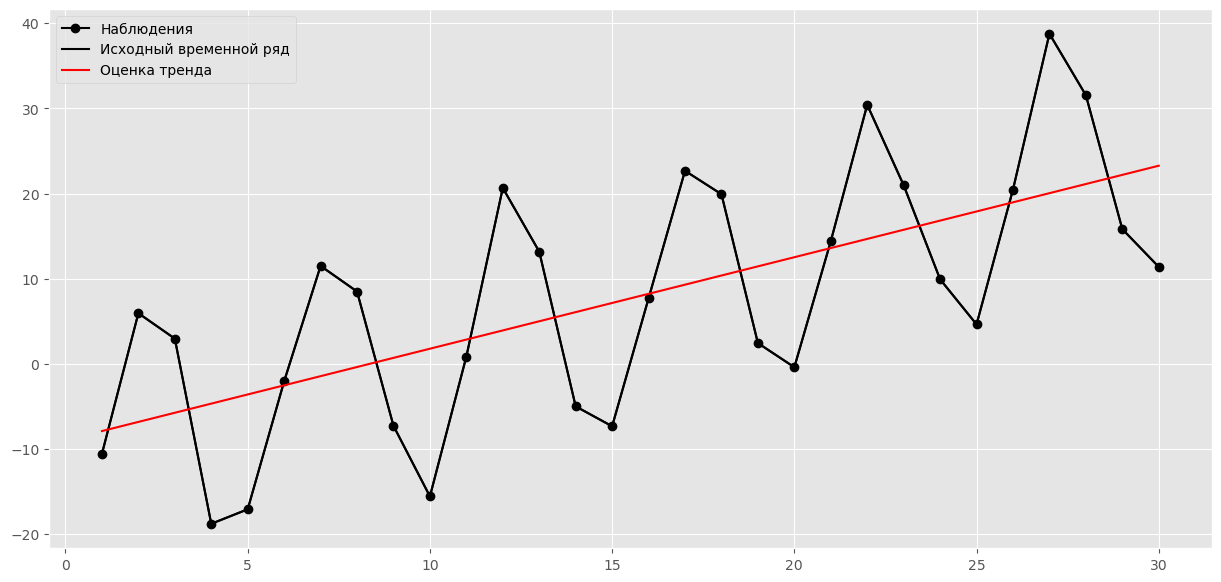

In [72]:
model = LinearRegression()
model.fit(t.reshape(-1, 1), y)
y_tr = model.predict(t.reshape(-1, 1))

fig = plt.figure(figsize = (15, 7))
plt.plot(t, y, marker = 'o', color = 'black')
plt.plot(t, y, color = 'black')
plt.plot(t, y_tr, color = 'red')
plt.legend(['Наблюдения', 'Исходный временной ряд', 'Оценка тренда'], loc = 'best')
plt.show()

## Пункт 4

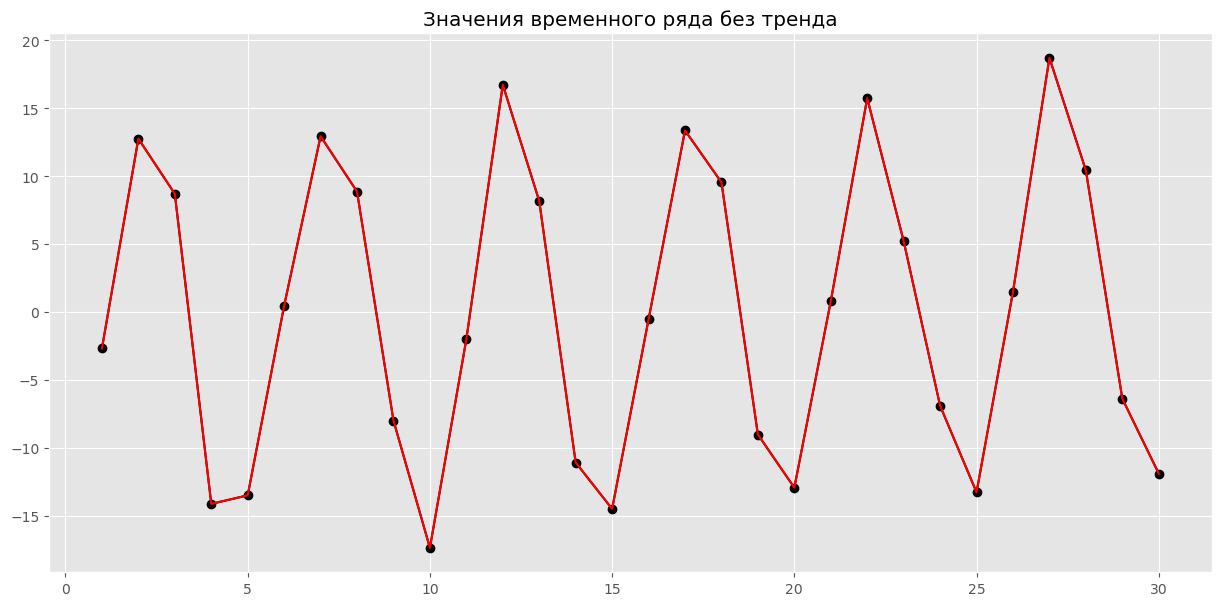

In [73]:
y_without_tr = y - y_tr

fig = plt.figure(figsize = (15, 7))
plt.plot(t, y_without_tr, marker = 'o', color = 'black')
plt.plot(t, y_without_tr, color = 'red')
plt.title('Значения временного ряда без тренда')
plt.show()

## Пункт 5

In [74]:
T = 5
m = int(len(y) / T)
S_t = list()
for i in range(T):
    temp = 0
    for j in range(m):
        temp += y[int(t[i]) - 1 + j * T] - y_tr[int(t[i]) - 1 + j * T]
    temp = temp * (1 / m)
    S_t.append(temp)

## Пункт 6

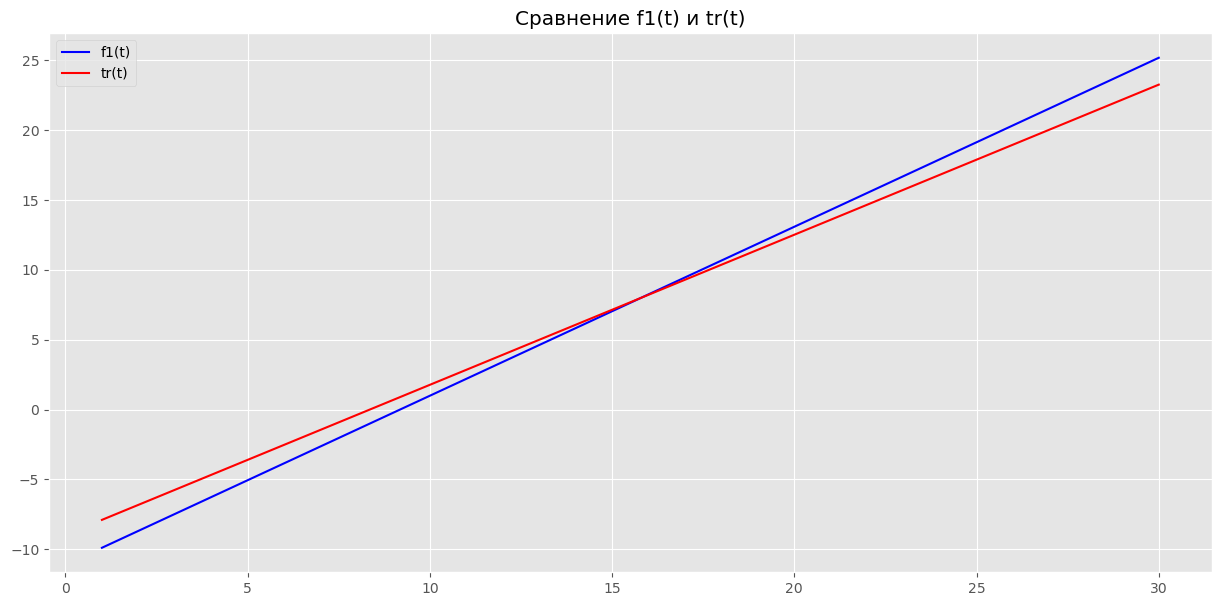

In [75]:
fig = plt.figure(figsize = (15, 7))

plt.plot(t, f1, color = 'blue')
plt.plot(t, y_tr, color = 'red')
plt.legend(['f1(t)', 'tr(t)'], loc = 'best')
plt.title('Сравнение f1(t) и tr(t)')
plt.show()

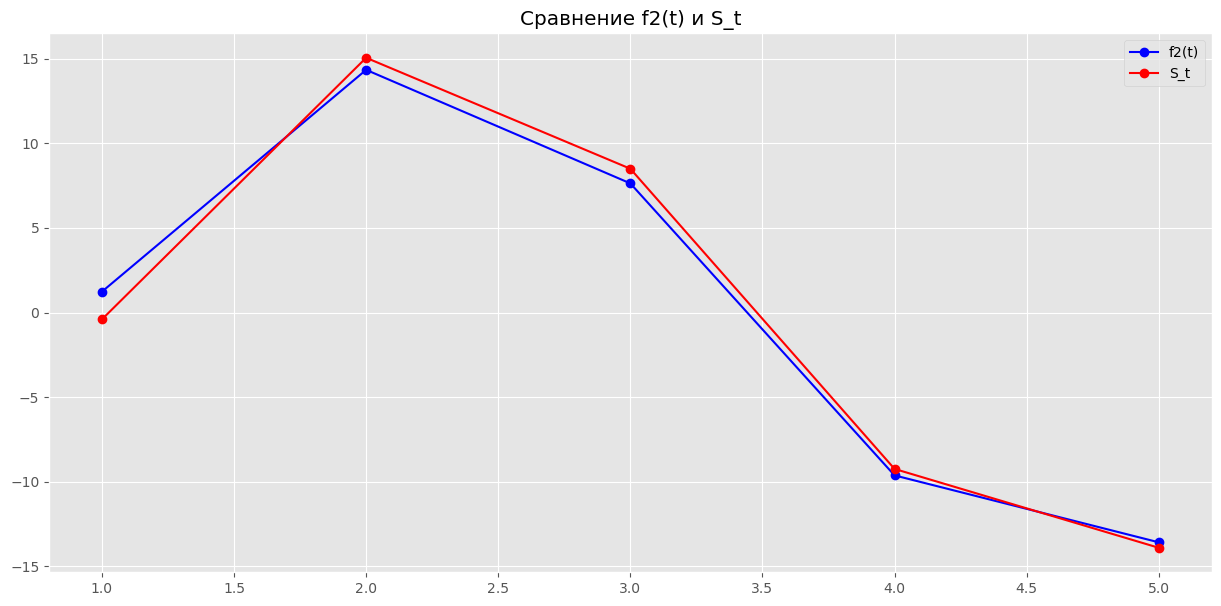

In [76]:
fig = plt.figure(figsize = (15, 7))

plt.plot(t[:T], f2[:T], marker = 'o', color = 'blue', label = 'f2(t)')
plt.plot(t[:T], S_t, marker = 'o', color = 'red', label = 'S_t')
plt.legend(loc = 'best')
plt.title('Сравнение f2(t) и S_t')
plt.show()

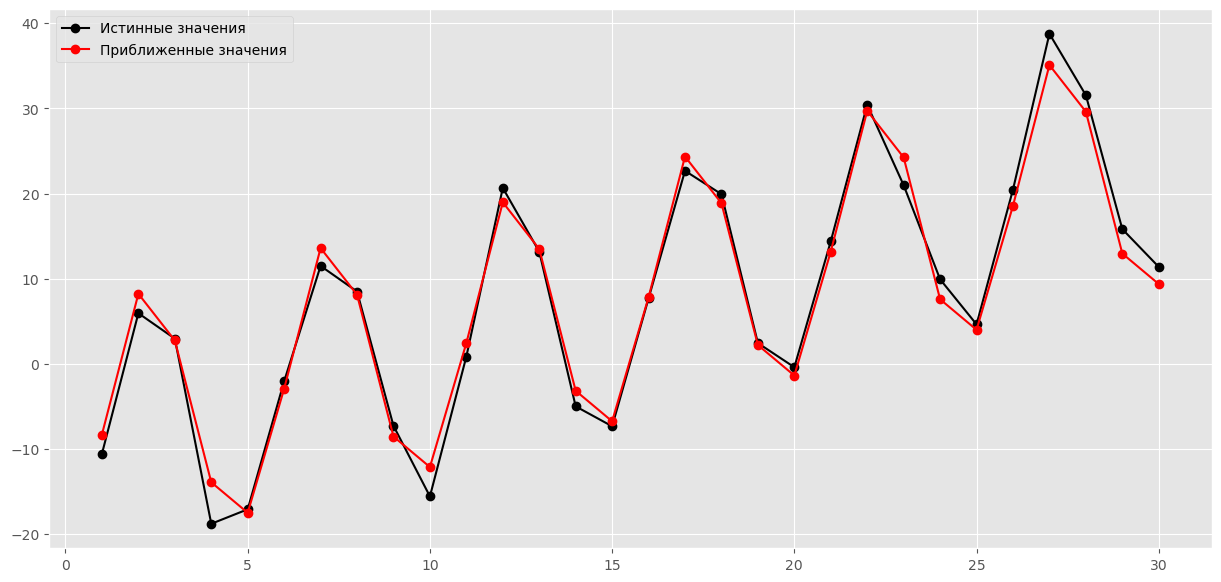

In [84]:
S_t_full = list()
for i in range(len(y)):
    S_t_full.append(S_t[i % T])

S_t_full = np.array(S_t_full)
y_close = y_tr + S_t_full

fig = plt.figure(figsize = (15, 7))
plt.plot(t, y, marker = 'o', color = 'black', label = 'Истинные значения')
plt.plot(t, y_close, marker = 'o', color = 'red', label = 'Приближенные значения')
plt.legend()
plt.show()

## Пункт 7

In [78]:
y_ost = y - y_close

## Пункт 8

In [79]:
s = np.sign(y_ost)

p_value = runstest_1samp(s)[1]
if p_value > 0.05:
    print('H0 не отвергается')
else:
    print('H0 отвергается в пользу альтернативной гипотезы')

H0 не отвергается


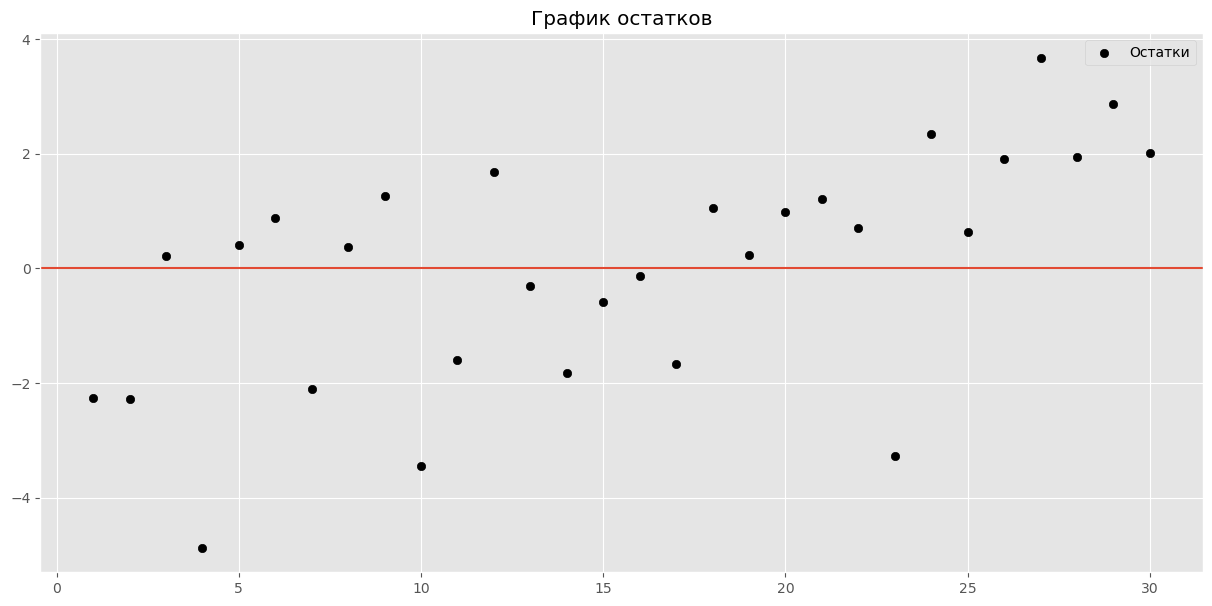

In [80]:
fig = plt.figure(figsize = (15, 7))

plt.axhline()
plt.scatter(t, y_ost, color = 'black', label = 'Остатки')
plt.legend(loc = 'best')
plt.title('График остатков')
plt.show()

## Пункт 9

In [82]:
d_stat = durbin_watson(y_ost)

print('Значение статистики критерия Дарбина-Уотсона: {0}'.format(d_stat))
print('({0}, {1})'.format(1.30, 1.57))

Значение статистики критерия Дарбина-Уотсона: 1.6094352270756938
(1.3, 1.57)


Значение статистики больше правого значение, значит нет оснований отвергать гипотезу о том, что остатки независимы

## Пункт 10

In [88]:
t_pred = np.linspace(31, 41, 11)
y_tr_pred = model.predict(t_pred.reshape(-1, 1))

S_t_pred = list()
for i in range(30, 41):
    S_t_pred.append(S_t[i % T])

y_pred_close = y_tr_pred + S_t_pred

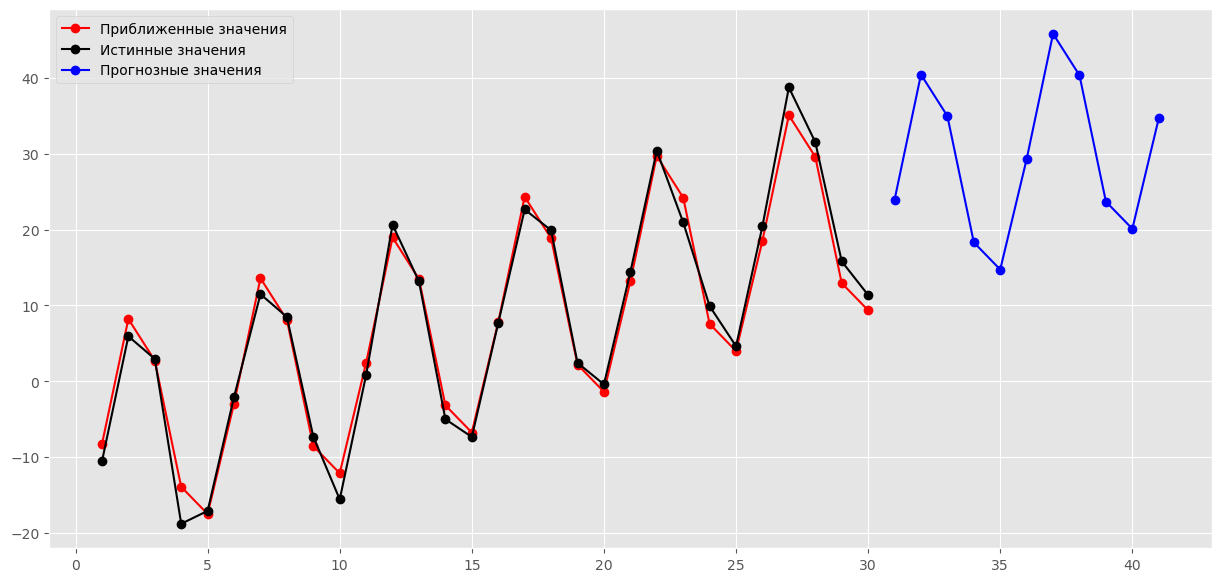

In [89]:
fig = plt.figure(figsize = (15, 7))

plt.plot(t, y_close, marker = 'o', color = 'red', label = 'Приближенные значения')
plt.plot(t, y, marker = 'o', color = 'black', label = 'Истинные значения')
plt.plot(t_pred, y_pred_close, marker = 'o', color = 'blue', label = 'Прогнозные значения')
plt.legend(loc = 'best')
plt.show()

### Сглаживание временного ряда

In [94]:
alpha1 = np.random.choice(np.linspace(-10, 10, 100))
alpha2 = np.random.choice(np.linspace(-10, 10, 100))
alpha3 = np.random.choice(np.linspace(-10, 10, 100))

beta1_1 = np.random.choice(np.linspace(0.01, 1.99, 100))
beta1_2 = np.random.choice(np.linspace(0.01, 1.99, 100))
beta1_3 = np.random.choice(np.linspace(0.01, 1.99, 100))

beta2_1 = np.random.choice(np.linspace(0.01, 2.99, 100))
beta2_2 = np.random.choice(np.linspace(-2.99, -0.01, 100))
beta2_3 = np.random.choice(np.linspace(0.01, 2.99, 100))

eps = norm(loc = 0, scale = 2).rvs(size = 40)

t = np.linspace(1, 40, 40)

y_1 = alpha1 + beta1_1 * t + beta2_1 * np.cos(2 * np.pi / 5 * t) + eps
y_2 = alpha2 + beta1_2 * t + beta2_2 * np.cos(2 * np.pi / 4 * t) + eps
y_3 = alpha3 + beta1_3 * t + beta2_3 * np.cos(2 * np.pi / 3 * t) + eps

y_3 = list(y_3)
y_3[20] = -500 + eps[20]
y_3[29] = 500 + eps[29]
y_3 = np.array(y_3)

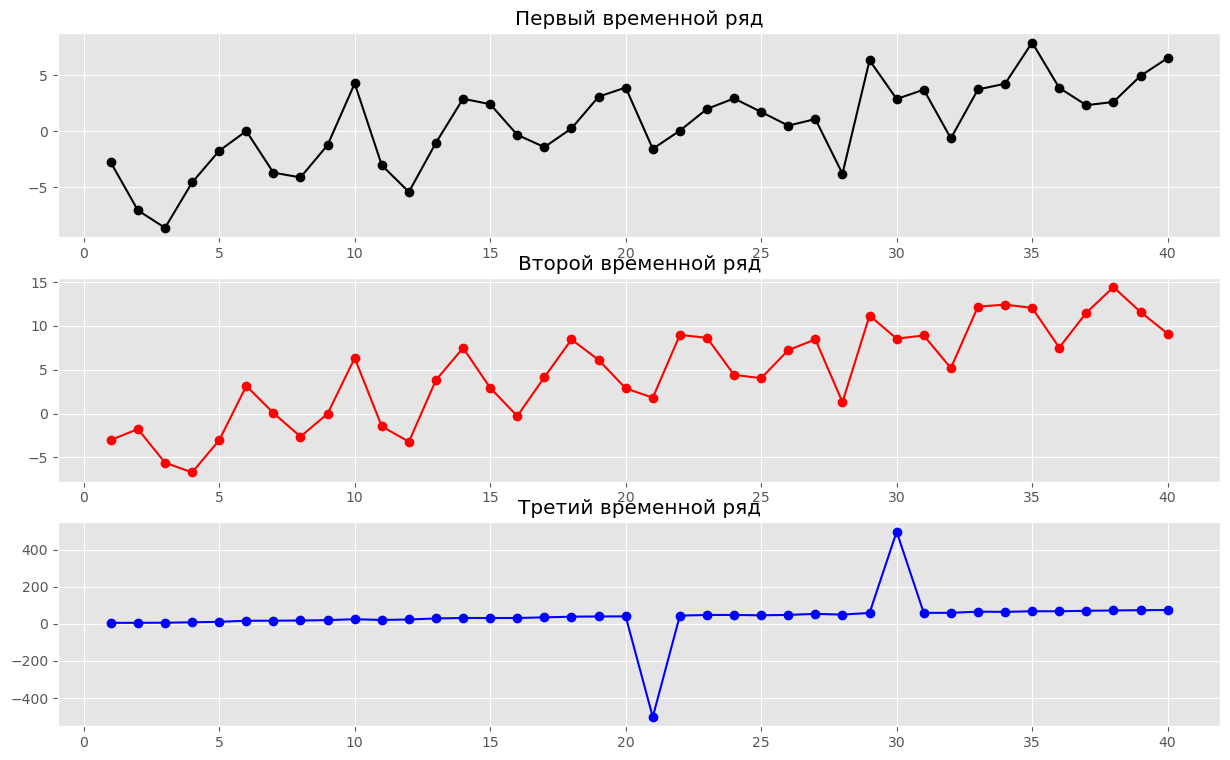

In [95]:
fig, gs = plt.figure(figsize = (15, 9)), gridspec.GridSpec(3, 1)

plt.subplot(gs[0])
plt.plot(t, y_1, marker = 'o', color = 'black')
plt.title('Первый временной ряд')

plt.subplot(gs[1])
plt.plot(t, y_2, marker = 'o', color = 'red')
plt.title('Второй временной ряд')

plt.subplot(gs[2])
plt.plot(t, y_3, marker = 'o', color = 'blue')
plt.title('Третий временной ряд')

plt.show()

## Пункт 2-3

In [99]:
y_1_df = pd.DataFrame({'t': t, 'y_1': y_1})
y_2_df = pd.DataFrame({'t': t, 'y_2': y_2})
y_3_df = pd.DataFrame({'t': t, 'y_3': y_3})

y1_mm3 = y_1_df['y_1'].rolling(window = 3).mean()
y2_mm3 = y_2_df['y_2'].rolling(window = 3).mean()
y3_mm3 = y_3_df['y_3'].rolling(window = 3).mean()

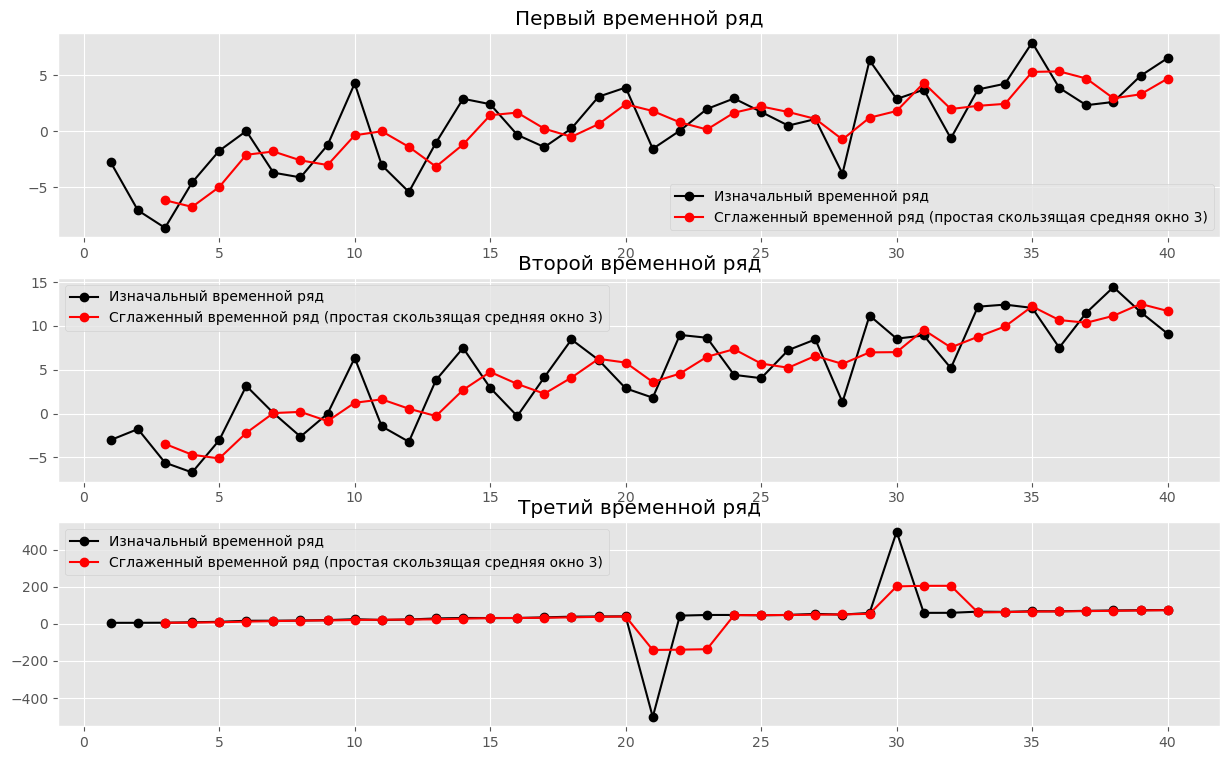

In [101]:
fig, gs = plt.figure(figsize = (15, 9)), gridspec.GridSpec(3, 1)

plt.subplot(gs[0])
plt.plot(t, y_1, marker = 'o', color = 'black', label = 'Изначальный временной ряд')
plt.plot(t, y1_mm3, marker = 'o', color = 'red', label = 'Сглаженный временной ряд (простая скользящая средняя окно 3)')
plt.legend(loc = 'best')
plt.title('Первый временной ряд')

plt.subplot(gs[1])
plt.plot(t, y_2, marker = 'o', color = 'black', label = 'Изначальный временной ряд')
plt.plot(t, y2_mm3, marker = 'o', color = 'red', label = 'Сглаженный временной ряд (простая скользящая средняя окно 3)')
plt.legend(loc = 'best')
plt.title('Второй временной ряд')

plt.subplot(gs[2])
plt.plot(t, y_3, marker = 'o', color = 'black', label = 'Изначальный временной ряд')
plt.plot(t, y3_mm3, marker = 'o', color = 'red', label = 'Сглаженный временной ряд (простая скользящая средняя окно 3)')
plt.legend(loc = 'best')
plt.title('Третий временной ряд')

plt.show()

In [102]:
y1_mm4 = y_1_df['y_1'].rolling(window = 4).mean()
y2_mm4 = y_2_df['y_2'].rolling(window = 4).mean()
y3_mm4 = y_3_df['y_3'].rolling(window = 4).mean()

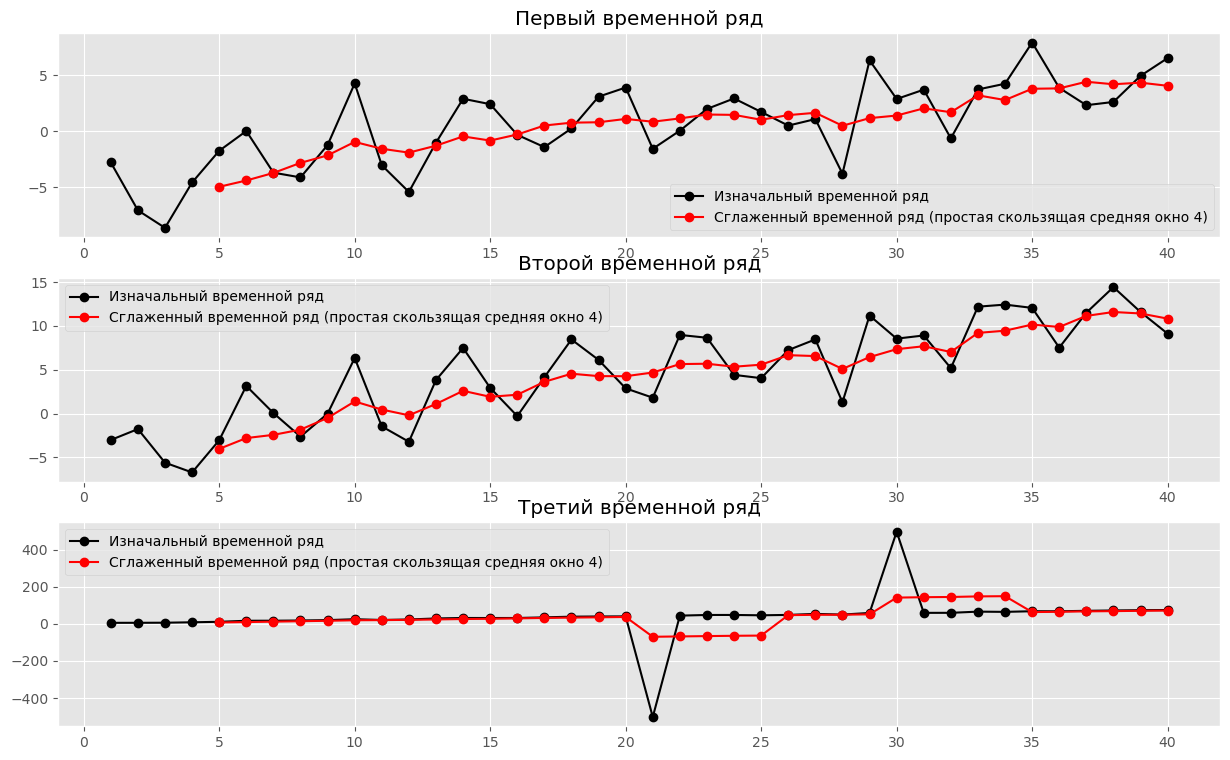

In [107]:
fig, gs = plt.figure(figsize = (15, 9)), gridspec.GridSpec(3, 1)

plt.subplot(gs[0])
plt.plot(t, y_1, marker = 'o', color = 'black', label = 'Изначальный временной ряд')
plt.plot(t, y1_mm4, marker = 'o', color = 'red', label = 'Сглаженный временной ряд (простая скользящая средняя окно 4)')
plt.legend(loc = 'best')
plt.title('Первый временной ряд')

plt.subplot(gs[1])
plt.plot(t, y_2, marker = 'o', color = 'black', label = 'Изначальный временной ряд')
plt.plot(t, y2_mm4, marker = 'o', color = 'red', label = 'Сглаженный временной ряд (простая скользящая средняя окно 4)')
plt.legend(loc = 'best')
plt.title('Второй временной ряд')

plt.subplot(gs[2])
plt.plot(t, y_3, marker = 'o', color = 'black', label = 'Изначальный временной ряд')
plt.plot(t, y3_mm4, marker = 'o', color = 'red', label = 'Сглаженный временной ряд (простая скользящая средняя окно 4)')
plt.legend(loc = 'best')
plt.title('Третий временной ряд')

plt.show()

In [105]:
y1_mm5 = y_1_df['y_1'].rolling(window = 5).mean()
y2_mm5 = y_2_df['y_2'].rolling(window = 5).mean()
y3_mm5 = y_3_df['y_3'].rolling(window = 5).mean()

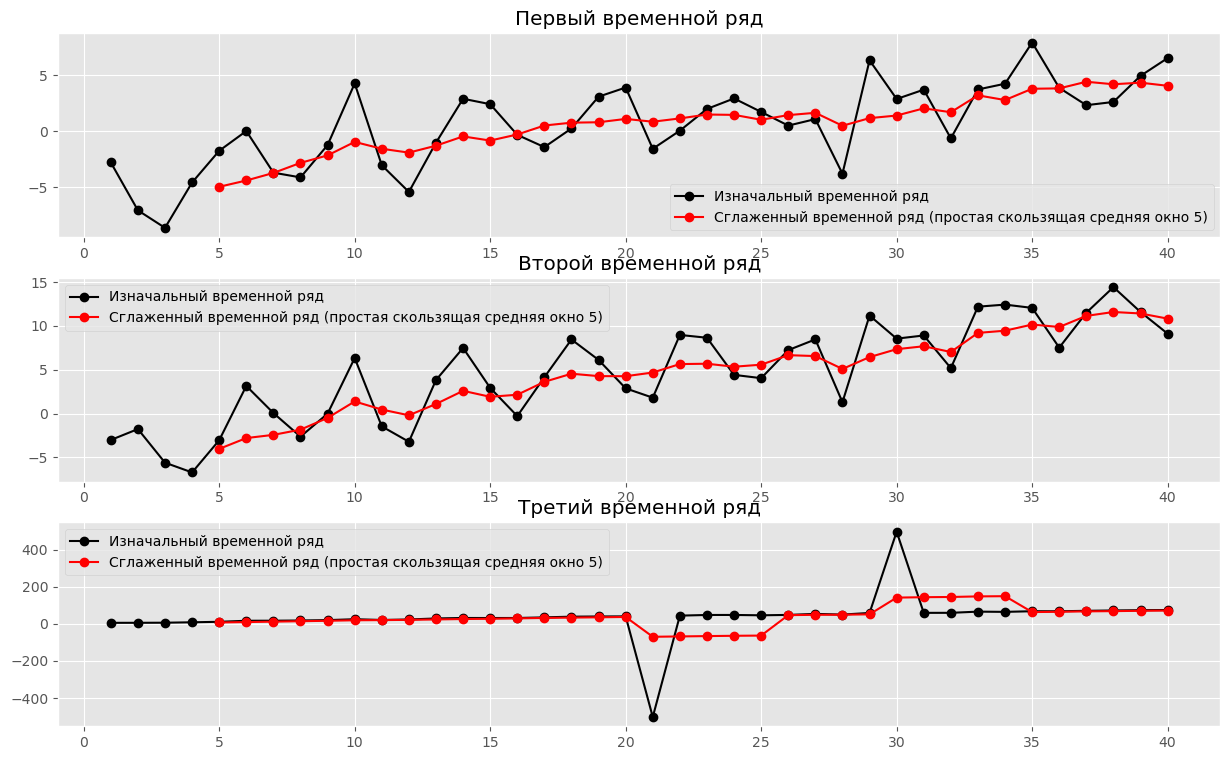

In [108]:
fig, gs = plt.figure(figsize = (15, 9)), gridspec.GridSpec(3, 1)

plt.subplot(gs[0])
plt.plot(t, y_1, marker = 'o', color = 'black', label = 'Изначальный временной ряд')
plt.plot(t, y1_mm5, marker = 'o', color = 'red', label = 'Сглаженный временной ряд (простая скользящая средняя окно 5)')
plt.legend(loc = 'best')
plt.title('Первый временной ряд')

plt.subplot(gs[1])
plt.plot(t, y_2, marker = 'o', color = 'black', label = 'Изначальный временной ряд')
plt.plot(t, y2_mm5, marker = 'o', color = 'red', label = 'Сглаженный временной ряд (простая скользящая средняя окно 5)')
plt.legend(loc = 'best')
plt.title('Второй временной ряд')

plt.subplot(gs[2])
plt.plot(t, y_3, marker = 'o', color = 'black', label = 'Изначальный временной ряд')
plt.plot(t, y3_mm5, marker = 'o', color = 'red', label = 'Сглаженный временной ряд (простая скользящая средняя окно 5)')
plt.legend(loc = 'best')
plt.title('Третий временной ряд')

plt.show()

In [112]:
w = np.array([0.1, 0.2, 0.4, 0.2, 0.1])
y1_mm = np.convolve(y_1, w, mode='valid')
y2_mm = np.convolve(y_2, w, mode='valid')
y3_mm = np.convolve(y_3, w, mode='valid')

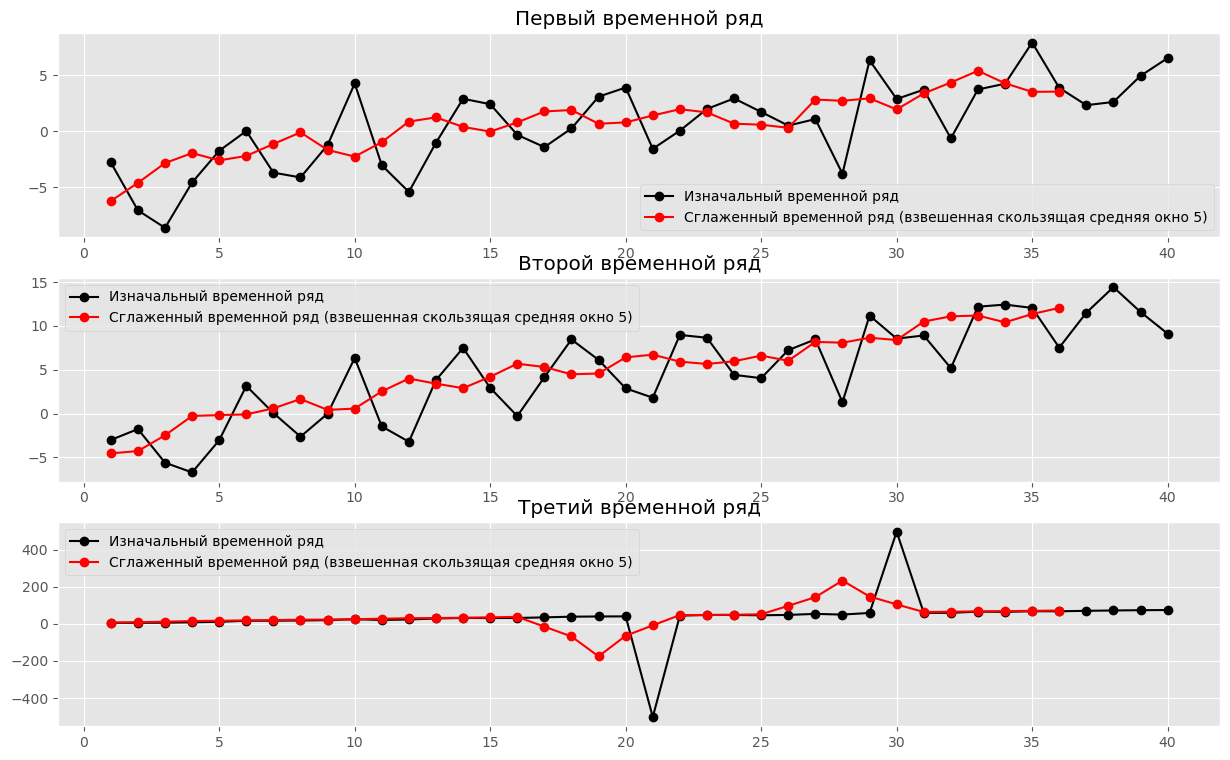

In [113]:
fig, gs = plt.figure(figsize = (15, 9)), gridspec.GridSpec(3, 1)

plt.subplot(gs[0])
plt.plot(t, y_1, marker = 'o', color = 'black', label = 'Изначальный временной ряд')
plt.plot(t[:-4], y1_mm, marker = 'o', color = 'red', label = 'Сглаженный временной ряд (взвешенная скользящая средняя окно 5)')
plt.legend(loc = 'best')
plt.title('Первый временной ряд')

plt.subplot(gs[1])
plt.plot(t, y_2, marker = 'o', color = 'black', label = 'Изначальный временной ряд')
plt.plot(t[:-4], y2_mm, marker = 'o', color = 'red', label = 'Сглаженный временной ряд (взвешенная скользящая средняя окно 5)')
plt.legend(loc = 'best')
plt.title('Второй временной ряд')

plt.subplot(gs[2])
plt.plot(t, y_3, marker = 'o', color = 'black', label = 'Изначальный временной ряд')
plt.plot(t[:-4], y3_mm, marker = 'o', color = 'red', label = 'Сглаженный временной ряд (взвешенная скользящая средняя окно 5)')
plt.legend(loc = 'best')
plt.title('Третий временной ряд')

plt.show()

In [114]:
y1_mmed = y_1_df['y_1'].rolling(window = 5).median()
y2_mmed = y_2_df['y_2'].rolling(window = 5).median()
y3_mmed = y_3_df['y_3'].rolling(window = 5).median()

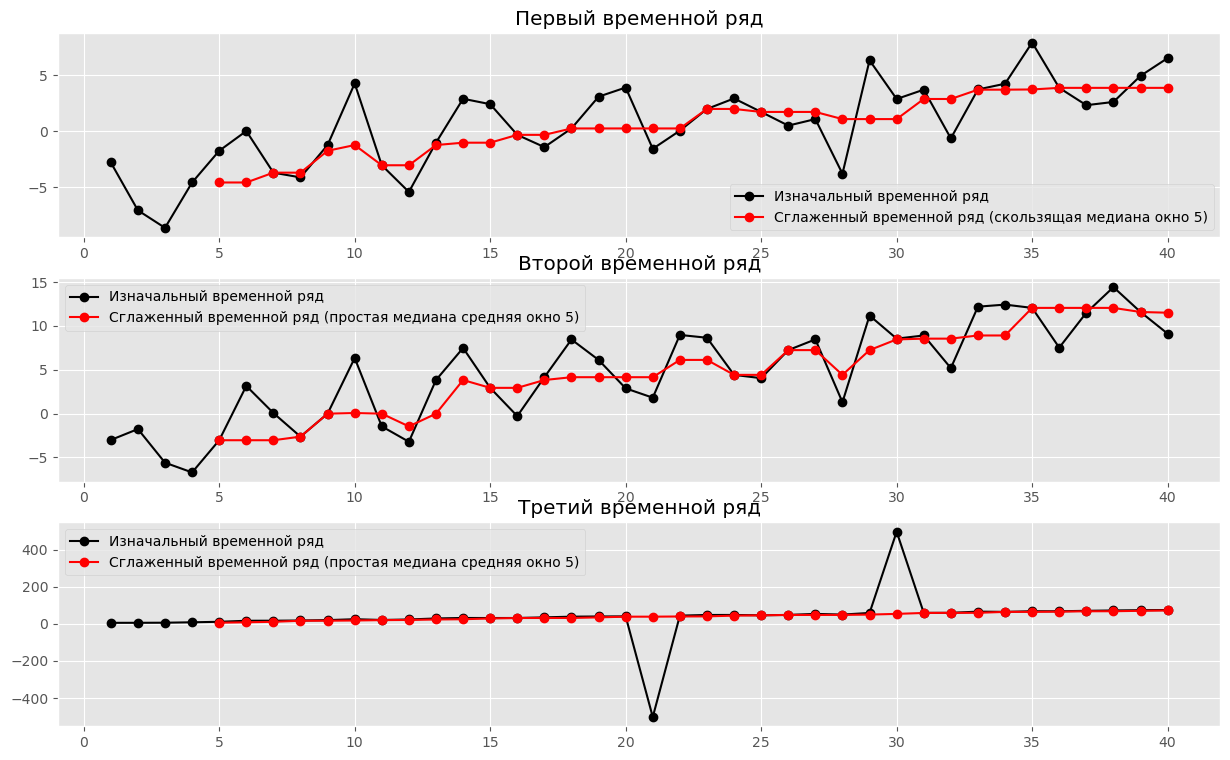

In [115]:
fig, gs = plt.figure(figsize = (15, 9)), gridspec.GridSpec(3, 1)

plt.subplot(gs[0])
plt.plot(t, y_1, marker = 'o', color = 'black', label = 'Изначальный временной ряд')
plt.plot(t, y1_mmed, marker = 'o', color = 'red', label = 'Сглаженный временной ряд (скользящая медиана окно 5)')
plt.legend(loc = 'best')
plt.title('Первый временной ряд')

plt.subplot(gs[1])
plt.plot(t, y_2, marker = 'o', color = 'black', label = 'Изначальный временной ряд')
plt.plot(t, y2_mmed, marker = 'o', color = 'red', label = 'Сглаженный временной ряд (простая медиана средняя окно 5)')
plt.legend(loc = 'best')
plt.title('Второй временной ряд')

plt.subplot(gs[2])
plt.plot(t, y_3, marker = 'o', color = 'black', label = 'Изначальный временной ряд')
plt.plot(t, y3_mmed, marker = 'o', color = 'red', label = 'Сглаженный временной ряд (простая медиана средняя окно 5)')
plt.legend(loc = 'best')
plt.title('Третий временной ряд')

plt.show()

In [117]:
ost_smooth = list()

temp = y_1 - y1_mm3
ost_smooth.append(temp)
temp = y_1 - y1_mm4
ost_smooth.append(temp)
temp = y_1 - y1_mm5
ost_smooth.append(temp)
temp = y_1[:36] - y1_mm
ost_smooth.append(temp)
temp = y_1 - y1_mmed
ost_smooth.append(temp)

temp = y_2 - y2_mm3
ost_smooth.append(temp)
temp = y_2 - y2_mm4
ost_smooth.append(temp)
temp = y_2 - y2_mm5
ost_smooth.append(temp)
temp = y_2[:36] - y2_mm
ost_smooth.append(temp)
temp = y_2 - y2_mmed
ost_smooth.append(temp)

temp = y_3 - y3_mm3
ost_smooth.append(temp)
temp = y_3 - y3_mm4
ost_smooth.append(temp)
temp = y_3 - y3_mm5
ost_smooth.append(temp)
temp = y_3[:36] - y3_mm
ost_smooth.append(temp)
temp = y_3 - y3_mmed
ost_smooth.append(temp)

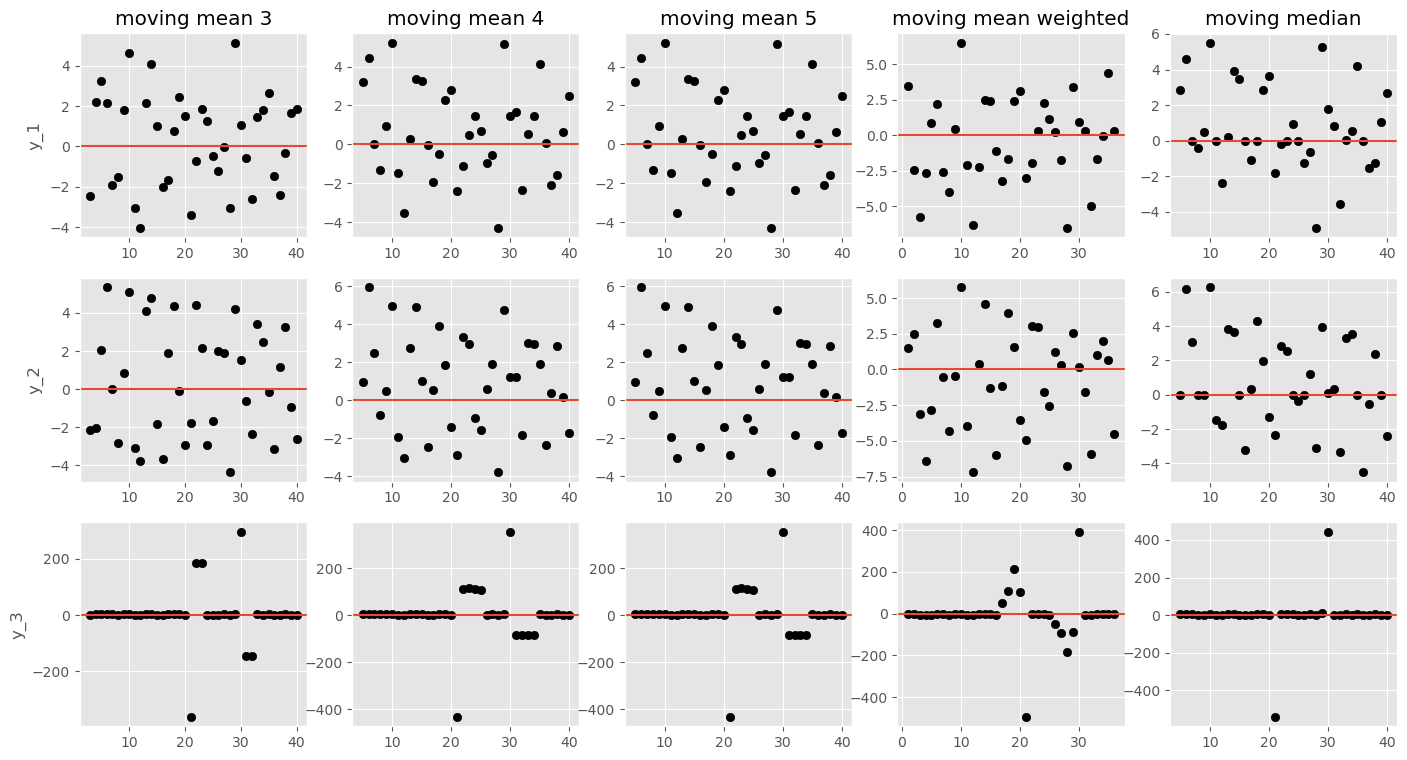

In [127]:
fig, gs = plt.figure(figsize = (17, 9)), gridspec.GridSpec(3, 5)

for i in range(3):
    for j in range(5):
        plt.subplot(gs[i, j])
        if i == 0 and j == 0:
            plt.title('moving mean 3')
        elif i == 0 and j == 1:
            plt.title('moving mean 4')
        elif i == 0 and j == 2:
            plt.title('moving mean 5')
        elif i == 0 and j == 3:
            plt.title('moving mean weighted')
        elif i == 0 and j == 4:
            plt.title('moving median')

        if j == 0 and i == 0:
            plt.ylabel('y_1')
        elif j == 0 and i == 1:
            plt.ylabel('y_2')
        elif j == 0 and i == 2:
            plt.ylabel('y_3')

        if j == 3:
            plt.scatter(t[:-4], ost_smooth[i * 5 + j], color = 'black')
        else:
            plt.scatter(t, ost_smooth[i * 5 + j], color = 'black')
        plt.axhline()

plt.show()